<a href="https://colab.research.google.com/github/ynaeem/termproject/blob/main/Term_Project_Yasir%20Naeem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret[full]



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 82.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 21.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 89.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 469.6 

In [2]:
import pycaret
pycaret.__version__


'3.2.0'

In [3]:
!wget -q https://archive.ics.uci.edu/static/public/186/wine+quality.zip
!unzip -q wine+quality.zip

In [4]:
import pandas as pd
df_redwine = pd.read_csv('winequality-red.csv',sep=';')
df_redwine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
#df_redwine.drop(columns="fixed acidity", inplace=True)
#df_redwine.drop(columns="volatile acidity", inplace=True)
#df_redwine.drop(columns="citric acid", inplace=True)
#df_redwine.drop(columns="residual sugar", inplace=True)
#df_redwine.drop(columns="chlorides", inplace=True)
df_redwine.drop(columns="free sulfur dioxide", inplace=True)
#df_redwine.drop(columns="total sulfur dioxide", inplace=True)
#df_redwine.drop(columns="density", inplace=True)
#df_redwine.drop(columns="pH", inplace=True)
#df_redwine.drop(columns="sulphates", inplace=True)

In [6]:
# import pycaret regression and init setup
from pycaret.regression import *
s = setup(df_redwine, target = 'alcohol', session_id = 123)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 11)"
4,Transformed data shape,"(1599, 11)"
5,Transformed train set shape,"(1119, 11)"
6,Transformed test set shape,"(480, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [7]:
df_redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
# import RegressionExperiment and init the class
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [9]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [10]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3332,0.2381,0.4859,0.7831,0.0413,0.0316,1.6650
lightgbm,Light Gradient Boosting Machine,0.3447,0.2654,0.5133,0.7561,0.0437,0.0327,0.1910
xgboost,Extreme Gradient Boosting,0.3391,0.2660,0.5135,0.7552,0.0438,0.0322,0.1240
et,Extra Trees Regressor,0.3403,0.2732,0.5213,0.7500,0.0444,0.0323,0.3620
gbr,Gradient Boosting Regressor,0.3990,0.2912,0.5383,0.7341,0.0461,0.0381,0.1570
rf,Random Forest Regressor,0.3718,0.2925,0.5390,0.7315,0.0460,0.0354,0.4400
lr,Linear Regression,0.4528,0.3606,0.5968,0.6695,0.0516,0.0434,0.9940
lar,Least Angle Regression,0.4528,0.3606,0.5968,0.6694,0.0516,0.0434,0.0200
ada,AdaBoost Regressor,0.5615,0.4770,0.6889,0.5653,0.0596,0.0544,0.1860
dt,Decision Tree Regressor,0.4709,0.5465,0.7370,0.4926,0.0630,0.0445,0.0220


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

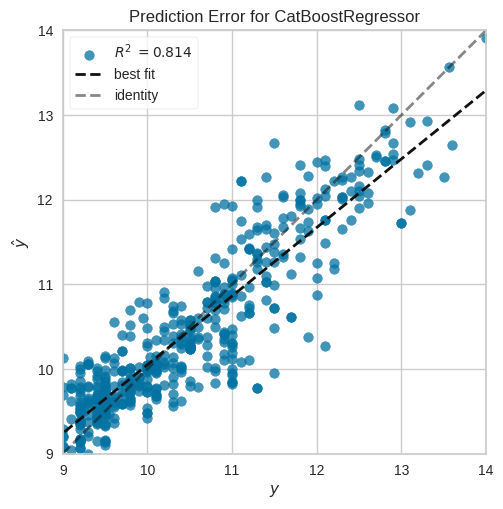

In [11]:
# plot error
plot_model(best, plot = 'error')

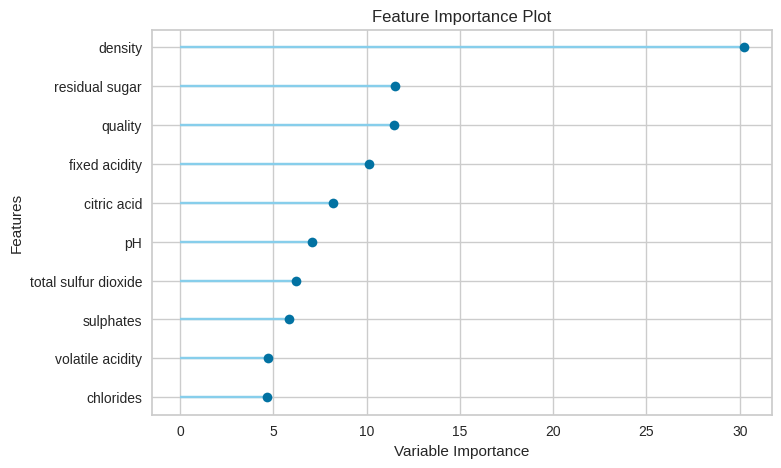

In [12]:
# plot feature importance
plot_model(best, plot = 'feature')


In [13]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.3425,0.2198,0.4688,0.8136,0.0401,0.0323


In [14]:
# show predictions df
holdout_pred.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
912,10.0,0.46,0.44,2.9,0.065,8.0,0.99674,3.33,0.62,6,12.2,11.257383
772,9.5,0.57,0.27,2.3,0.082,144.0,0.99782,3.27,0.55,5,9.4,9.515613
1037,7.3,0.91,0.10,1.8,0.074,56.0,0.99672,3.35,0.56,5,9.2,9.387682
1106,8.2,0.23,0.42,1.9,0.069,17.0,0.99376,3.21,0.54,6,12.3,12.012927
263,7.9,0.37,0.23,1.8,0.077,49.0,0.99630,3.28,0.67,5,9.3,9.791457


In [15]:
new_data = holdout_pred.copy()
new_data.drop('alcohol', axis=1, inplace=True)
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,quality,prediction_label
912,10.0,0.46,0.44,2.9,0.065,8.0,0.99674,3.33,0.62,6,11.257383
772,9.5,0.57,0.27,2.3,0.082,144.0,0.99782,3.27,0.55,5,9.515613
1037,7.3,0.91,0.10,1.8,0.074,56.0,0.99672,3.35,0.56,5,9.387682
1106,8.2,0.23,0.42,1.9,0.069,17.0,0.99376,3.21,0.54,6,12.012927
263,7.9,0.37,0.23,1.8,0.077,49.0,0.99630,3.28,0.67,5,9.791457


In [16]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,quality,prediction_label,prediction_label
912,10.0,0.46,0.44,2.9,0.065,8.0,0.99674,3.33,0.62,6,11.257382,11.257383
772,9.5,0.57,0.27,2.3,0.082,144.0,0.99782,3.27,0.55,5,9.515613,9.515613
1037,7.3,0.91,0.10,1.8,0.074,56.0,0.99672,3.35,0.56,5,9.387682,9.387682
1106,8.2,0.23,0.42,1.9,0.069,17.0,0.99376,3.21,0.54,6,12.012927,12.012927
263,7.9,0.37,0.23,1.8,0.077,49.0,0.99630,3.28,0.67,5,9.791457,9.791457


In [17]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['fixed acidity',
                                              'volatile acidity', 'citric acid',
                                              'residual sugar', 'chlorides',
                                              'total sulfur dioxide', 'density',
                                              'pH', 'sulphates', 'quality'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trained_model',
                  <catboost.core.CatBoostRegressor object at 0x783174bd4f70>)]),
 'my_first_pipeline.pkl')

In [18]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x783173fed990>)])

In [19]:
s = setup(df_redwine, target = 'alcohol', session_id = 123)

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 11)"
4,Transformed data shape,"(1599, 11)"
5,Transformed train set shape,"(1119, 11)"
6,Transformed test set shape,"(480, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


In [20]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [23]:
# lets access X_train_transformed
get_config('X_train_transformed')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,quality
374,14.0,0.410,0.63,3.8,0.089,47.0,1.00140,3.01,0.81,6.0
800,7.2,0.610,0.08,4.0,0.082,108.0,0.99641,3.25,0.51,5.0
1441,7.4,0.785,0.19,5.2,0.094,98.0,0.99713,3.16,0.52,6.0
1269,5.5,0.490,0.03,1.8,0.044,87.0,0.99080,3.50,0.82,8.0
691,9.2,0.920,0.24,2.6,0.087,93.0,0.99980,3.48,0.54,5.0
...,...,...,...,...,...,...,...,...,...,...
1122,6.3,0.470,0.00,1.4,0.055,33.0,0.99220,3.45,0.48,6.0
1346,6.1,0.590,0.01,2.1,0.056,13.0,0.99472,3.52,0.56,5.0
1406,8.2,0.240,0.34,5.1,0.062,22.0,0.99740,3.22,0.94,6.0
1389,6.7,0.480,0.02,2.2,0.080,111.0,0.99524,3.10,0.53,5.0


In [24]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 1100)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 1100


In [25]:
# init setup with normalize = True
s = setup(df_redwine, target = 'alcohol', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,alcohol
2,Target type,Regression
3,Original data shape,"(1599, 11)"
4,Transformed data shape,"(1599, 11)"
5,Transformed train set shape,"(1119, 11)"
6,Transformed test set shape,"(480, 11)"
7,Numeric features,10
8,Preprocess,True
9,Imputation type,simple


<Axes: >

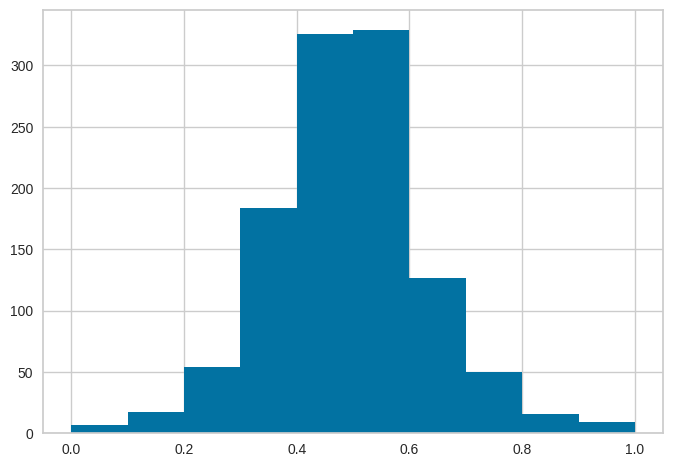

In [26]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['density'].hist()

In [27]:
x_test = get_config('test')

In [28]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3333,0.2380,0.4858,0.7832,0.0413,0.0316,1.6740
xgboost,Extreme Gradient Boosting,0.3391,0.2660,0.5135,0.7552,0.0438,0.0322,0.1740
lightgbm,Light Gradient Boosting Machine,0.3477,0.2664,0.5146,0.7551,0.0439,0.0331,0.4190
et,Extra Trees Regressor,0.3403,0.2725,0.5206,0.7507,0.0444,0.0323,0.2510
gbr,Gradient Boosting Regressor,0.3987,0.2904,0.5376,0.7348,0.0460,0.0381,0.1650
rf,Random Forest Regressor,0.3727,0.2931,0.5396,0.7309,0.0461,0.0355,0.5100
br,Bayesian Ridge,0.4531,0.3606,0.5969,0.6695,0.0516,0.0434,0.0230
lr,Linear Regression,0.4528,0.3606,0.5968,0.6694,0.0516,0.0434,0.4630
lar,Least Angle Regression,0.4528,0.3606,0.5968,0.6694,0.0516,0.0434,0.0240
huber,Huber Regressor,0.4477,0.3634,0.5985,0.6672,0.0519,0.0428,0.0750


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [29]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [30]:
# train linear regression with default fold=10
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4313,0.3005,0.5481,0.6521,0.0487,0.0425
1,0.4910,0.4731,0.6878,0.5405,0.0598,0.0471
2,0.4492,0.3263,0.5712,0.7267,0.0495,0.0431
3,0.5102,0.4397,0.6631,0.6656,0.0567,0.0487
4,0.4070,0.2852,0.5340,0.6794,0.0458,0.0386
5,0.4332,0.3378,0.5812,0.7179,0.0492,0.0407
6,0.3622,0.2123,0.4607,0.8080,0.0398,0.0343
7,0.4855,0.4113,0.6413,0.6683,0.0555,0.0465
8,0.4844,0.3991,0.6318,0.5608,0.0554,0.0467


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [31]:
predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.4630,0.3594,0.5995,0.6952,0.0518,0.0439


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
912,10.0,0.46,0.44,2.9,0.065,8.0,0.99674,3.33,0.62,6,12.2,11.624212
772,9.5,0.57,0.27,2.3,0.082,144.0,0.99782,3.27,0.55,5,9.4,9.759073
1037,7.3,0.91,0.10,1.8,0.074,56.0,0.99672,3.35,0.56,5,9.2,9.717298
1106,8.2,0.23,0.42,1.9,0.069,17.0,0.99376,3.21,0.54,6,12.3,11.522197
263,7.9,0.37,0.23,1.8,0.077,49.0,0.99630,3.28,0.67,5,9.3,9.913708
...,...,...,...,...,...,...,...,...,...,...,...,...
1466,7.3,0.48,0.32,2.1,0.062,54.0,0.99728,3.30,0.65,7,10.0,9.776804
580,12.3,0.50,0.49,2.2,0.089,14.0,1.00020,3.19,0.44,5,9.6,9.722743
1082,7.2,0.38,0.30,1.8,0.073,70.0,0.99685,3.42,0.59,6,9.5,9.900639
1279,9.8,0.30,0.39,1.7,0.062,9.0,0.99480,3.14,0.57,7,11.5,11.723764


In [32]:
lasso = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7868,0.9384,0.9687,-0.0867,0.0846,0.0779
1,0.8525,1.0305,1.0151,-0.0010,0.0870,0.0810
2,0.9139,1.1968,1.0940,-0.0026,0.0929,0.0868
3,0.9225,1.3156,1.1470,-0.0007,0.0970,0.0872
4,0.8098,0.8942,0.9456,-0.0054,0.0812,0.0766
5,0.8920,1.2168,1.1031,-0.0164,0.0922,0.0823
6,0.8585,1.1093,1.0532,-0.0035,0.0883,0.0802
7,0.9162,1.2442,1.1154,-0.0036,0.0948,0.0862
8,0.8082,0.9127,0.9553,-0.0043,0.0827,0.0778


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [33]:
predict_model(lasso)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Regression,0.8938,1.1880,1.0899,-0.0076,0.0922,0.0836


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
912,10.0,0.46,0.44,2.9,0.065,8.0,0.99674,3.33,0.62,6,12.2,10.394548
772,9.5,0.57,0.27,2.3,0.082,144.0,0.99782,3.27,0.55,5,9.4,10.394548
1037,7.3,0.91,0.10,1.8,0.074,56.0,0.99672,3.35,0.56,5,9.2,10.394548
1106,8.2,0.23,0.42,1.9,0.069,17.0,0.99376,3.21,0.54,6,12.3,10.394548
263,7.9,0.37,0.23,1.8,0.077,49.0,0.99630,3.28,0.67,5,9.3,10.394548
...,...,...,...,...,...,...,...,...,...,...,...,...
1466,7.3,0.48,0.32,2.1,0.062,54.0,0.99728,3.30,0.65,7,10.0,10.394548
580,12.3,0.50,0.49,2.2,0.089,14.0,1.00020,3.19,0.44,5,9.6,10.394548
1082,7.2,0.38,0.30,1.8,0.073,70.0,0.99685,3.42,0.59,6,9.5,10.394548
1279,9.8,0.30,0.39,1.7,0.062,9.0,0.99480,3.14,0.57,7,11.5,10.394548


In [34]:
rid = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4353,0.2918,0.5402,0.6621,0.0479,0.0430
1,0.5140,0.4649,0.6818,0.5484,0.0594,0.0493
2,0.5045,0.3756,0.6129,0.6853,0.0526,0.0482
3,0.5274,0.4655,0.6823,0.6459,0.0577,0.0501
4,0.4107,0.2983,0.5462,0.6646,0.0465,0.0389
5,0.4617,0.3837,0.6194,0.6795,0.0520,0.0431
6,0.4068,0.2698,0.5194,0.7560,0.0434,0.0381
7,0.5249,0.4398,0.6631,0.6453,0.0572,0.0502
8,0.4789,0.3986,0.6314,0.5613,0.0552,0.0460


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [35]:
predict_model(rid)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,0.4873,0.3833,0.6191,0.6749,0.0531,0.0460


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
912,10.0,0.46,0.44,2.9,0.065,8.0,0.99674,3.33,0.62,6,12.2,11.434462
772,9.5,0.57,0.27,2.3,0.082,144.0,0.99782,3.27,0.55,5,9.4,9.662831
1037,7.3,0.91,0.10,1.8,0.074,56.0,0.99672,3.35,0.56,5,9.2,9.792908
1106,8.2,0.23,0.42,1.9,0.069,17.0,0.99376,3.21,0.54,6,12.3,11.459227
263,7.9,0.37,0.23,1.8,0.077,49.0,0.99630,3.28,0.67,5,9.3,9.970773
...,...,...,...,...,...,...,...,...,...,...,...,...
1466,7.3,0.48,0.32,2.1,0.062,54.0,0.99728,3.30,0.65,7,10.0,10.122352
580,12.3,0.50,0.49,2.2,0.089,14.0,1.00020,3.19,0.44,5,9.6,9.715435
1082,7.2,0.38,0.30,1.8,0.073,70.0,0.99685,3.42,0.59,6,9.5,10.078538
1279,9.8,0.30,0.39,1.7,0.062,9.0,0.99480,3.14,0.57,7,11.5,11.645817


In [36]:
catboost = create_model('catboost')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2842,0.1615,0.4018,0.8130,0.0357,0.0279
1,0.3851,0.2999,0.5476,0.7087,0.0472,0.0366
2,0.3354,0.2141,0.4627,0.8206,0.0404,0.0324
3,0.3513,0.2798,0.5289,0.7872,0.0452,0.0336
4,0.3001,0.1930,0.4393,0.7830,0.0372,0.0284
5,0.3430,0.2668,0.5165,0.7771,0.0424,0.0315
6,0.3153,0.2845,0.5334,0.7426,0.0428,0.0290
7,0.3535,0.2301,0.4797,0.8144,0.0409,0.0335
8,0.3105,0.2040,0.4516,0.7756,0.0390,0.0297


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [37]:
predict_model(catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.3422,0.2194,0.4684,0.8139,0.0401,0.0322


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
912,10.0,0.46,0.44,2.9,0.065,8.0,0.99674,3.33,0.62,6,12.2,11.257383
772,9.5,0.57,0.27,2.3,0.082,144.0,0.99782,3.27,0.55,5,9.4,9.515613
1037,7.3,0.91,0.10,1.8,0.074,56.0,0.99672,3.35,0.56,5,9.2,9.387682
1106,8.2,0.23,0.42,1.9,0.069,17.0,0.99376,3.21,0.54,6,12.3,12.012927
263,7.9,0.37,0.23,1.8,0.077,49.0,0.99630,3.28,0.67,5,9.3,9.791457
...,...,...,...,...,...,...,...,...,...,...,...,...
1466,7.3,0.48,0.32,2.1,0.062,54.0,0.99728,3.30,0.65,7,10.0,10.052081
580,12.3,0.50,0.49,2.2,0.089,14.0,1.00020,3.19,0.44,5,9.6,9.605097
1082,7.2,0.38,0.30,1.8,0.073,70.0,0.99685,3.42,0.59,6,9.5,9.472479
1279,9.8,0.30,0.39,1.7,0.062,9.0,0.99480,3.14,0.57,7,11.5,11.611215


In [38]:
# tune hyperparameters of catboost
tuned_catboost = tune_model(catboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3126,0.1874,0.4330,0.7829,0.0386,0.0310
1,0.4241,0.3459,0.5881,0.6640,0.0507,0.0404
2,0.3907,0.2924,0.5407,0.7551,0.0463,0.0373
3,0.3805,0.2736,0.5231,0.7919,0.0451,0.0365
4,0.3062,0.1943,0.4408,0.7815,0.0377,0.0292
5,0.3624,0.2961,0.5441,0.7527,0.0442,0.0328
6,0.3250,0.3109,0.5576,0.7187,0.0447,0.0298
7,0.4140,0.2852,0.5341,0.7699,0.0459,0.0394
8,0.3389,0.2259,0.4753,0.7515,0.0411,0.0325


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [39]:
tuned_catboost = tune_model(catboost, n_iter=10, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3126,0.1874,0.4330,0.7829,0.0386,0.0310
1,0.4241,0.3459,0.5881,0.6640,0.0507,0.0404
2,0.3907,0.2924,0.5407,0.7551,0.0463,0.0373
3,0.3805,0.2736,0.5231,0.7919,0.0451,0.0365
4,0.3062,0.1943,0.4408,0.7815,0.0377,0.0292
5,0.3624,0.2961,0.5441,0.7527,0.0442,0.0328
6,0.3250,0.3109,0.5576,0.7187,0.0447,0.0298
7,0.4140,0.2852,0.5341,0.7699,0.0459,0.0394
8,0.3389,0.2259,0.4753,0.7515,0.0411,0.0325


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [40]:
tuned_catboost = tune_model(catboost,
                            fold=5,
                            n_iter=10,
                            optimize='R2',
                            custom_grid={
                                'depth': [4, 6, 8],
                                'learning_rate': [0.01, 0.05, 0.1],
                                'l2_leaf_reg': [1, 3, 5],
                                'subsample': [0.8, 0.9],
                                'bagging_temperature': [0.1, 0.5, 1],
                                'border_count': [32, 64, 128],
                                'random_strength': [0.1, 0.5, 1],
                                'grow_policy': ['SymmetricTree', 'Depthwise', 'Lossguide'],
                                'min_child_samples': [1, 5, 10]
                            })

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3235,0.2161,0.4649,0.7761,0.0404,0.0311
1,0.3573,0.2708,0.5204,0.7841,0.0447,0.0342
2,0.3062,0.2301,0.4797,0.7796,0.0402,0.0286
3,0.3193,0.2595,0.5094,0.7787,0.0422,0.0299
4,0.3546,0.2688,0.5184,0.7567,0.0443,0.0337
Mean,0.3322,0.2491,0.4986,0.7750,0.0424,0.0315
Std,0.0203,0.0220,0.0223,0.0096,0.0019,0.0021


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [41]:
tuned_catboost = tune_model(catboost,
                            optimize='R2',
                            custom_grid={'depth': [4, 6, 8],
                                         'learning_rate': [0.01, 0.05, 0.1],
                                         'l2_leaf_reg': [1, 3, 5],
                                         'subsample': [0.8, 0.9],
                                         'bagging_temperature': [0.1, 0.5, 1],
                                         'border_count': [32, 64, 128]})

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2866,0.1813,0.4258,0.7901,0.0378,0.0282
1,0.3665,0.3082,0.5551,0.7007,0.0478,0.0346
2,0.3246,0.2065,0.4544,0.8270,0.0397,0.0313
3,0.3312,0.2672,0.5169,0.7968,0.0440,0.0314
4,0.2628,0.1720,0.4147,0.8066,0.0352,0.0248
5,0.3162,0.2550,0.5050,0.7870,0.0412,0.0287
6,0.3108,0.3204,0.5660,0.7102,0.0454,0.0286
7,0.3326,0.2235,0.4728,0.8197,0.0400,0.0314
8,0.2909,0.2065,0.4545,0.7727,0.0392,0.0278


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [42]:
predict_model(tuned_catboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,0.3308,0.2264,0.4758,0.8079,0.0407,0.0311


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
912,10.0,0.46,0.44,2.9,0.065,8.0,0.99674,3.33,0.62,6,12.2,11.194615
772,9.5,0.57,0.27,2.3,0.082,144.0,0.99782,3.27,0.55,5,9.4,9.347096
1037,7.3,0.91,0.10,1.8,0.074,56.0,0.99672,3.35,0.56,5,9.2,9.423861
1106,8.2,0.23,0.42,1.9,0.069,17.0,0.99376,3.21,0.54,6,12.3,11.624047
263,7.9,0.37,0.23,1.8,0.077,49.0,0.99630,3.28,0.67,5,9.3,9.838484
...,...,...,...,...,...,...,...,...,...,...,...,...
1466,7.3,0.48,0.32,2.1,0.062,54.0,0.99728,3.30,0.65,7,10.0,10.010477
580,12.3,0.50,0.49,2.2,0.089,14.0,1.00020,3.19,0.44,5,9.6,9.590032
1082,7.2,0.38,0.30,1.8,0.073,70.0,0.99685,3.42,0.59,6,9.5,9.450589
1279,9.8,0.30,0.39,1.7,0.062,9.0,0.99480,3.14,0.57,7,11.5,11.506140


In [43]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3294,0.2050,0.4527,0.7626,0.0403,0.0325
1,0.3994,0.3462,0.5884,0.6637,0.0506,0.0381
2,0.3661,0.2810,0.5301,0.7646,0.0457,0.0351
3,0.3683,0.2636,0.5134,0.7995,0.0439,0.0350
4,0.2809,0.1994,0.4465,0.7758,0.0378,0.0265
5,0.3316,0.2652,0.5150,0.7784,0.0425,0.0305
6,0.3307,0.3022,0.5497,0.7267,0.0443,0.0304
7,0.3542,0.2575,0.5075,0.7923,0.0443,0.0341
8,0.3571,0.2823,0.5313,0.6894,0.0457,0.0342


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [44]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3898,0.2553,0.5053,0.7044,0.0445,0.0384
1,0.4699,0.3925,0.6265,0.6187,0.0545,0.0451
2,0.4673,0.3671,0.6059,0.6924,0.0519,0.0447
3,0.4761,0.3766,0.6137,0.7135,0.0521,0.0450
4,0.3649,0.2846,0.5335,0.6800,0.0448,0.0345
5,0.4204,0.3420,0.5848,0.7143,0.0482,0.0388
6,0.4021,0.4186,0.6470,0.6213,0.0526,0.0372
7,0.4600,0.3413,0.5842,0.7247,0.0507,0.0443
8,0.4130,0.2971,0.5451,0.6730,0.0474,0.0398


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [45]:
xgboost = create_model('xgboost')


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3152,0.2186,0.4675,0.7469,0.0410,0.0309
1,0.3798,0.3308,0.5752,0.6787,0.0493,0.0358
2,0.3513,0.2574,0.5073,0.7844,0.0439,0.0338
3,0.3150,0.2344,0.4842,0.8217,0.0419,0.0302
4,0.2899,0.1937,0.4401,0.7822,0.0383,0.0279
5,0.3506,0.2641,0.5139,0.7794,0.0426,0.0323
6,0.3566,0.3717,0.6097,0.6637,0.0497,0.0328
7,0.3346,0.2336,0.4834,0.8115,0.0413,0.0319
8,0.3355,0.2680,0.5177,0.7051,0.0441,0.0318


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [46]:
tuned_xgboost = tune_model(xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3138,0.1890,0.4348,0.7811,0.0386,0.0309
1,0.4156,0.3314,0.5757,0.6781,0.0497,0.0394
2,0.3522,0.2174,0.4663,0.8179,0.0402,0.0336
3,0.3966,0.3011,0.5488,0.7710,0.0475,0.0381
4,0.3238,0.2073,0.4553,0.7669,0.0386,0.0307
5,0.3531,0.2525,0.5025,0.7890,0.0418,0.0328
6,0.3402,0.3043,0.5516,0.7248,0.0448,0.0316
7,0.3540,0.2542,0.5042,0.7950,0.0440,0.0341
8,0.3608,0.2555,0.5055,0.7188,0.0436,0.0346


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [47]:
predict_model(tuned_xgboost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting,0.3575,0.2267,0.4761,0.8077,0.0410,0.0338


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
912,10.0,0.46,0.44,2.9,0.065,8.0,0.99674,3.33,0.62,6,12.2,11.632869
772,9.5,0.57,0.27,2.3,0.082,144.0,0.99782,3.27,0.55,5,9.4,9.586758
1037,7.3,0.91,0.10,1.8,0.074,56.0,0.99672,3.35,0.56,5,9.2,9.478227
1106,8.2,0.23,0.42,1.9,0.069,17.0,0.99376,3.21,0.54,6,12.3,11.974432
263,7.9,0.37,0.23,1.8,0.077,49.0,0.99630,3.28,0.67,5,9.3,9.642913
...,...,...,...,...,...,...,...,...,...,...,...,...
1466,7.3,0.48,0.32,2.1,0.062,54.0,0.99728,3.30,0.65,7,10.0,10.001384
580,12.3,0.50,0.49,2.2,0.089,14.0,1.00020,3.19,0.44,5,9.6,9.848378
1082,7.2,0.38,0.30,1.8,0.073,70.0,0.99685,3.42,0.59,6,9.5,9.441818
1279,9.8,0.30,0.39,1.7,0.062,9.0,0.99480,3.14,0.57,7,11.5,11.545559


In [48]:
# ensemble with bagging
ensemble_model(catboost, method = 'Bagging')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3078,0.1724,0.4152,0.8004,0.0370,0.0303
1,0.3960,0.3055,0.5527,0.7032,0.0476,0.0376
2,0.3633,0.2354,0.4852,0.8028,0.0419,0.0348
3,0.3795,0.2802,0.5293,0.7869,0.0453,0.0363
4,0.3021,0.2043,0.4520,0.7703,0.0382,0.0286
5,0.3500,0.2684,0.5181,0.7758,0.0424,0.0321
6,0.3226,0.3126,0.5591,0.7172,0.0448,0.0297
7,0.3719,0.2403,0.4902,0.8062,0.0419,0.0353
8,0.3249,0.2107,0.4590,0.7681,0.0396,0.0311


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingRegressor(estimator=<catboost.core.CatBoostRegressor object at 0x783172b41ed0>,
                 random_state=123)

In [49]:
# ensemble with boosting
ensemble_model(catboost, method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2910,0.1653,0.4066,0.8085,0.0362,0.0287
1,0.3737,0.2930,0.5413,0.7154,0.0466,0.0356
2,0.3503,0.2283,0.4779,0.8087,0.0415,0.0337
3,0.3514,0.2682,0.5179,0.7960,0.0445,0.0336
4,0.2894,0.1900,0.4359,0.7863,0.0371,0.0275
5,0.3314,0.2529,0.5029,0.7888,0.0411,0.0303
6,0.2989,0.2900,0.5385,0.7377,0.0429,0.0275
7,0.3487,0.2342,0.4839,0.8111,0.0415,0.0332
8,0.3061,0.1967,0.4435,0.7835,0.0384,0.0295


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

AdaBoostRegressor(estimator=<catboost.core.CatBoostRegressor object at 0x783172fc49d0>,
                  n_estimators=10, random_state=123)

In [50]:
best_mae_models_top3 = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3333,0.2380,0.4858,0.7832,0.0413,0.0316,1.7140
xgboost,Extreme Gradient Boosting,0.3391,0.2660,0.5135,0.7552,0.0438,0.0322,0.1370
lightgbm,Light Gradient Boosting Machine,0.3477,0.2664,0.5146,0.7551,0.0439,0.0331,0.1610
et,Extra Trees Regressor,0.3403,0.2725,0.5206,0.7507,0.0444,0.0323,0.2540
gbr,Gradient Boosting Regressor,0.3987,0.2904,0.5376,0.7348,0.0460,0.0381,0.2610
rf,Random Forest Regressor,0.3727,0.2931,0.5396,0.7309,0.0461,0.0355,0.4460
br,Bayesian Ridge,0.4531,0.3606,0.5969,0.6695,0.0516,0.0434,0.0360
lr,Linear Regression,0.4528,0.3606,0.5968,0.6694,0.0516,0.0434,0.0250
lar,Least Angle Regression,0.4528,0.3606,0.5968,0.6694,0.0516,0.0434,0.0420
huber,Huber Regressor,0.4477,0.3634,0.5985,0.6672,0.0519,0.0428,0.0430


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [51]:
# Compare models and select the top 3 based on R2
top_models = compare_models(sort='R2', n_select=3)


































,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,0.3333,0.2380,0.4858,0.7832,0.0413,0.0316,1.7220
xgboost,Extreme Gradient Boosting,0.3391,0.2660,0.5135,0.7552,0.0438,0.0322,0.2020
lightgbm,Light Gradient Boosting Machine,0.3477,0.2664,0.5146,0.7551,0.0439,0.0331,0.3790
et,Extra Trees Regressor,0.3403,0.2725,0.5206,0.7507,0.0444,0.0323,0.2490
gbr,Gradient Boosting Regressor,0.3987,0.2904,0.5376,0.7348,0.0460,0.0381,0.2150
rf,Random Forest Regressor,0.3727,0.2931,0.5396,0.7309,0.0461,0.0355,0.4350
br,Bayesian Ridge,0.4531,0.3606,0.5969,0.6695,0.0516,0.0434,0.0370
lr,Linear Regression,0.4528,0.3606,0.5968,0.6694,0.0516,0.0434,0.0240
lar,Least Angle Regression,0.4528,0.3606,0.5968,0.6694,0.0516,0.0434,0.0240
huber,Huber Regressor,0.4477,0.3634,0.5985,0.6672,0.0519,0.0428,0.0730


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [52]:
# Assuming top_models is a list of models
best_models_top3 = top_models[:4]

# Continue with the rest of your code
blend_model = blend_models(estimator_list=best_models_top3)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2994,0.1798,0.4240,0.7918,0.0376,0.0294
1,0.3738,0.3067,0.5538,0.7021,0.0477,0.0355
2,0.3403,0.2299,0.4795,0.8074,0.0416,0.0327
3,0.3337,0.2437,0.4937,0.8146,0.0424,0.0319
4,0.2730,0.1710,0.4135,0.8077,0.0354,0.0260
5,0.3247,0.2463,0.4963,0.7943,0.0408,0.0299
6,0.3213,0.3027,0.5502,0.7262,0.0442,0.0295
7,0.3351,0.2218,0.4710,0.8211,0.0406,0.0320
8,0.3190,0.2306,0.4802,0.7462,0.0412,0.0305


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [53]:
predict_model(blend_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.3329,0.2100,0.4583,0.8219,0.0392,0.0314


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
912,10.0,0.46,0.44,2.9,0.065,8.0,0.99674,3.33,0.62,6,12.2,11.127420
772,9.5,0.57,0.27,2.3,0.082,144.0,0.99782,3.27,0.55,5,9.4,9.463070
1037,7.3,0.91,0.10,1.8,0.074,56.0,0.99672,3.35,0.56,5,9.2,9.519068
1106,8.2,0.23,0.42,1.9,0.069,17.0,0.99376,3.21,0.54,6,12.3,12.089010
263,7.9,0.37,0.23,1.8,0.077,49.0,0.99630,3.28,0.67,5,9.3,9.815531
...,...,...,...,...,...,...,...,...,...,...,...,...
1466,7.3,0.48,0.32,2.1,0.062,54.0,0.99728,3.30,0.65,7,10.0,10.035185
580,12.3,0.50,0.49,2.2,0.089,14.0,1.00020,3.19,0.44,5,9.6,9.728664
1082,7.2,0.38,0.30,1.8,0.073,70.0,0.99685,3.42,0.59,6,9.5,9.462116
1279,9.8,0.30,0.39,1.7,0.062,9.0,0.99480,3.14,0.57,7,11.5,11.661061


In [54]:
# stack models
stacked_model = stack_models(best_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3105,0.1640,0.4050,0.8101,0.0360,0.0306
1,0.3915,0.3189,0.5647,0.6902,0.0488,0.0373
2,0.3278,0.1964,0.4432,0.8355,0.0385,0.0315
3,0.3541,0.2626,0.5124,0.8003,0.0439,0.0339
4,0.3244,0.2058,0.4536,0.7686,0.0385,0.0307
5,0.3247,0.2313,0.4809,0.8068,0.0396,0.0300
6,0.2955,0.2099,0.4581,0.8102,0.0372,0.0274
7,0.3554,0.2220,0.4711,0.8210,0.0406,0.0339
8,0.3331,0.2139,0.4625,0.7647,0.0401,0.0320


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [55]:
predict_model(stacked_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,0.3392,0.2065,0.4544,0.8248,0.0390,0.0320


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,quality,alcohol,prediction_label
912,10.0,0.46,0.44,2.9,0.065,8.0,0.99674,3.33,0.62,6,12.2,11.382223
772,9.5,0.57,0.27,2.3,0.082,144.0,0.99782,3.27,0.55,5,9.4,9.614639
1037,7.3,0.91,0.10,1.8,0.074,56.0,0.99672,3.35,0.56,5,9.2,9.432516
1106,8.2,0.23,0.42,1.9,0.069,17.0,0.99376,3.21,0.54,6,12.3,12.020613
263,7.9,0.37,0.23,1.8,0.077,49.0,0.99630,3.28,0.67,5,9.3,9.805585
...,...,...,...,...,...,...,...,...,...,...,...,...
1466,7.3,0.48,0.32,2.1,0.062,54.0,0.99728,3.30,0.65,7,10.0,9.793275
580,12.3,0.50,0.49,2.2,0.089,14.0,1.00020,3.19,0.44,5,9.6,9.732663
1082,7.2,0.38,0.30,1.8,0.073,70.0,0.99685,3.42,0.59,6,9.5,9.443281
1279,9.8,0.30,0.39,1.7,0.062,9.0,0.99480,3.14,0.57,7,11.5,11.707444


In [56]:
pip install --upgrade yellowbrick


In [57]:
pip install --upgrade catboost

In [58]:
# train lightgbm model
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3294,0.2050,0.4527,0.7626,0.0403,0.0325
1,0.3994,0.3462,0.5884,0.6637,0.0506,0.0381
2,0.3661,0.2810,0.5301,0.7646,0.0457,0.0351
3,0.3683,0.2636,0.5134,0.7995,0.0439,0.0350
4,0.2809,0.1994,0.4465,0.7758,0.0378,0.0265
5,0.3316,0.2652,0.5150,0.7784,0.0425,0.0305
6,0.3307,0.3022,0.5497,0.7267,0.0443,0.0304
7,0.3542,0.2575,0.5075,0.7923,0.0443,0.0341
8,0.3571,0.2823,0.5313,0.6894,0.0457,0.0342


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

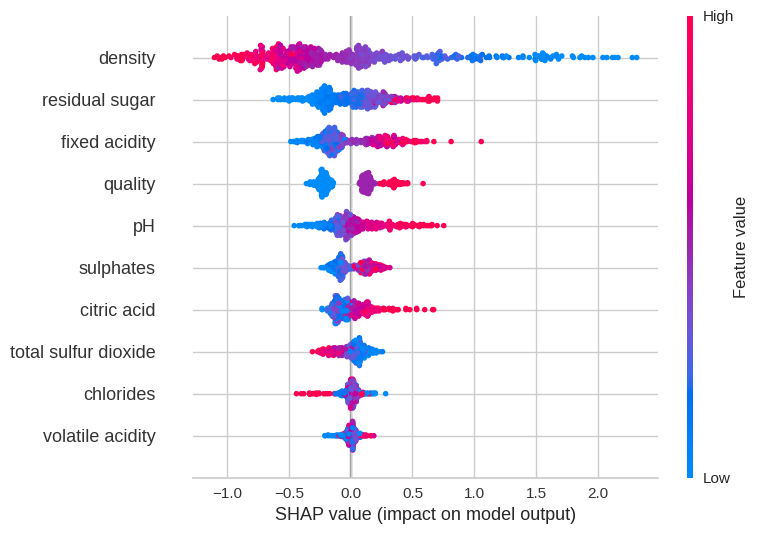

In [59]:
# interpret summary model
interpret_model(catboost, plot = 'summary')

In [60]:
# reason plot for test set observation 1
interpret_model(catboost, plot = 'reason', observation = 1)

In [61]:
# get leaderboard
lb = get_leaderboard()
lb

Processing:   0%|          | 0/84 [00:00<?, ?it/s]

,Model Name,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
Index,,,,,,,,
0,Linear Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.4528,0.3606,0.5968,0.6694,0.0516,0.0434
1,Lasso Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.8665,1.1158,1.0537,-0.0126,0.0896,0.0820
2,Ridge Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.4761,0.3823,0.6156,0.6513,0.0529,0.0455
3,Elastic Net,"(TransformerWrapper(include=['fixed acidity', ...",0.8665,1.1158,1.0537,-0.0126,0.0896,0.0820
4,Least Angle Regression,"(TransformerWrapper(include=['fixed acidity', ...",0.4528,0.3606,0.5968,0.6694,0.0516,0.0434
...,...,...,...,...,...,...,...,...
78,CatBoost Regressor,"(TransformerWrapper(include=['fixed acidity', ...",0.3333,0.2380,0.4858,0.7832,0.0413,0.0316
79,Dummy Regressor,"(TransformerWrapper(include=['fixed acidity', ...",0.8665,1.1158,1.0537,-0.0126,0.0896,0.0820
80,Voting Regressor,"(TransformerWrapper(include=['fixed acidity', ...",0.3263,0.2374,0.4854,0.7825,0.0414,0.0310


In [62]:
# select the best model based on MAE
lb.sort_values(by='R2', ascending=True)['Model'].iloc[0]

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['fixed acidity',
                                             'volatile acidity', 'citric acid',
                                             'residual sugar', 'chlorides',
                                             'total sulfur dioxide', 'density',
                                             'pH', 'sulphates', 'quality'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('clean_column_names',
                 TransformerWrapper(transformer=CleanColumnNames())),
                ['trained_model', Lasso(random_state=123)]])

In [63]:
# find best model based on CV metrics
automl()

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x783096992a70>),
                              ('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cpu',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=123, ...)),
                              ('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

In [64]:
# dashboard function
dashboard(stacked_model, display_format ='inline')

Generating self.shap_explainer = shap.KernelExplainer(model, X)...
Building ExplainerDashboard..
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/480 [00:00<?, ?it/s]

Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [65]:
# create gradio app
create_app(stacked_model)

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://669d3da39894b23e9c.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [66]:
# create api
create_api(best, api_name = 'my_first_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python my_first_api.py


In [68]:
create_docker('my_first_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            
